<a href="https://colab.research.google.com/github/vineet-babar44/Job-Postings-Analysis/blob/main/2_Skills_in_Demand_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What are the most demanded skills for the top 3 most popular data roles?
### Questions to Answer
1. Skills in demand required for top 3 jobs in US
2. Likelihood of Skills Requested in US Job Postings

*Step 1 : Importing Libraries*

In [ ]:
pip install datasets

In [ ]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

In [ ]:
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

*Step 2 : Data Cleaning*

In [ ]:
df['job_posted_date'] =  pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

*Step 3 : Filtering Data required for Analysis*

In [ ]:
df_US = df[df['job_country']=='United States']
df_skills=df_US.explode('job_skills')

## Q.1 Skills in demand required for top 3 jobs in US

In [ ]:
df_skills_counts = df_skills.groupby(['job_skills', 'job_title_short']).size().to_frame('skill_count').reset_index()
df_skills_counts = df_skills_counts.sort_values(by='skill_count', ascending=False)
type(df_skills_counts)
df_skills_counts.head(5)

In [ ]:
job_titles = df_skills_counts['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

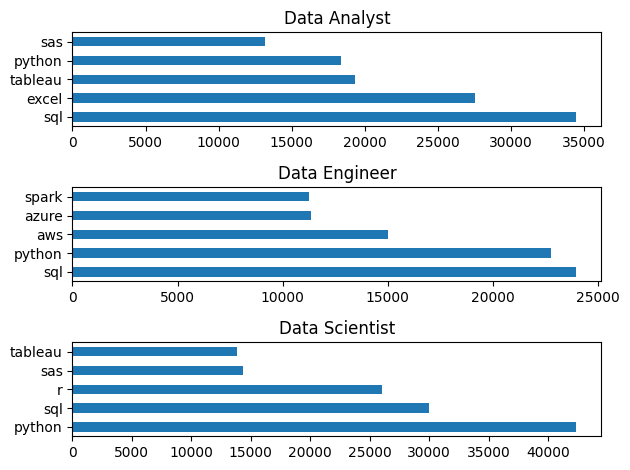

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skills_counts[df_skills_counts['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    # ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    fig.tight_layout()

plt.show()


## Q.2 Likelihood of Skills Requested in US Job Postings

In [ ]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [ ]:
df_skills_perc = pd.merge(df_skills_counts,df_job_title_count, on='job_title_short', how='left')
df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count']/df_skills_perc['jobs_total']
df_skills_perc

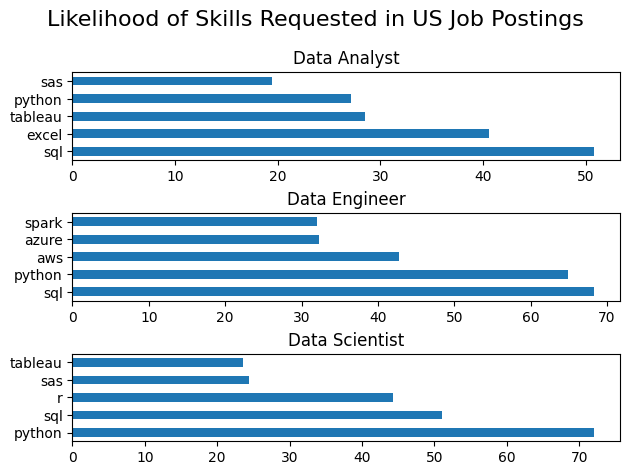

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    # ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    # fig.tight_layout()

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=16)
fig.tight_layout(h_pad=0.5)
plt.show()
